## Compute spikes/LFP coherence

Add some explanation

#### Load modules

In [1]:
import h5py
import numpy as np
from scipy import signal, stats
import matplotlib.pyplot as plt
import physig as ps
import connectivity_measures as cm

In [2]:
# 3 seconds pre and 3 second post at 1 KHz
mPFC_LFP_WT = np.load('/home/maspe/filer/SERT/ALL/npys/mPFC_LFP_WT.npy', allow_pickle=True)
mPFC_LFP_KO = np.load('/home/maspe/filer/SERT/ALL/npys/mPFC_LFP_KO.npy', allow_pickle=True)

In [3]:
mPFC_LFP_WT.shape

(60, 6000)

In [4]:
# 2 second pre and 2 second post at 30 KHz
spikes = np.load('/home/maspe/filer/SERT/ALL/npys/spikes.npy', allow_pickle=True).item()

#### Filter LFP in theta band

In [5]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

#N       = 2
fs      = 1000.0
lowcut  = 5.0
highcut = 12.0

N = 4
b, a = butter_bandpass(lowcut, highcut, fs, order=N)
theta_WT = signal.filtfilt(b=b, a=a, x=mPFC_LFP_WT,
                           axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)

theta_KO = signal.filtfilt(b=b, a=a, x=mPFC_LFP_KO,
                           axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)

#### Apply Hilbert transform to form the analytic signal

In [6]:
z_WT = signal.hilbert(theta_WT)
z_KO = signal.hilbert(theta_KO)

In [7]:
rz_WT = z_WT[:,2500:4000]
rz_KO = z_KO[:,2500:4000]

# mz_WT = np.mean(z_WT, axis=0)
# mz_KO = np.mean(z_KO, axis=0)

In [8]:
rz_WT.shape

(60, 1500)

#### Spiking data

In [9]:
spikes_NAC_WT = np.sum([spikes['WT']['NAC'][key] for key in spikes['WT']['NAC'].keys()], axis=0)
spikes_BLA_WT = np.sum([spikes['WT']['BLA'][key] for key in spikes['WT']['BLA'].keys()], axis=0)
spikes_vHip_WT = np.sum([spikes['WT']['vHip'][key] for key in spikes['WT']['vHip'].keys()], axis=0)

spikes_NAC_KO = np.sum([spikes['KO']['NAC'][key] for key in spikes['KO']['NAC'].keys()], axis=0)
spikes_BLA_KO = np.sum([spikes['KO']['BLA'][key] for key in spikes['KO']['BLA'].keys()], axis=0)
spikes_vHip_KO = np.sum([spikes['KO']['vHip'][key] for key in spikes['KO']['vHip'].keys()], axis=0)

In [10]:
spikes_NAC_KO.shape

(120000,)

In [10]:
spikes_NAC_WT = spikes_NAC_WT[45000:90000]
spikes_BLA_WT = spikes_BLA_WT[45000:90000]
spikes_vHip_WT = spikes_vHip_WT[45000:90000]

spikes_NAC_KO = spikes_NAC_KO[45000:90000]
spikes_BLA_KO = spikes_BLA_KO[45000:90000]
spikes_vHip_KO = spikes_vHip_KO[45000:90000]


In [11]:
rspikes_NAC_WT = np.add.reduceat(spikes_NAC_WT, range(0, spikes_NAC_WT.shape[0], 30), dtype='int')
rspikes_BLA_WT = np.add.reduceat(spikes_BLA_WT, range(0, spikes_BLA_WT.shape[0], 30), dtype='int')
rspikes_vHip_WT = np.add.reduceat(spikes_vHip_WT, range(0, spikes_vHip_WT.shape[0], 30), dtype='int')

rspikes_NAC_KO = np.add.reduceat(spikes_NAC_KO, range(0, spikes_NAC_KO.shape[0], 30), dtype='int')
rspikes_BLA_KO = np.add.reduceat(spikes_BLA_KO, range(0, spikes_BLA_KO.shape[0], 30), dtype='int')
rspikes_vHip_KO = np.add.reduceat(spikes_vHip_KO, range(0, spikes_vHip_KO.shape[0], 30), dtype='int')


In [13]:
phases_WT = np.mean(np.angle(rz_WT), axis=0)
amplitudes_WT = np.mean(np.absolute(rz_WT), axis=0)

pre_spikesLFP_NAC_WT = (np.repeat(phases_WT[0:500], rspikes_NAC_WT[0:500]),
                        np.repeat(amplitudes_WT[0:500], rspikes_NAC_WT[0:500]))
pre_spikesLFP_BLA_WT = (np.repeat(phases_WT[0:500], rspikes_BLA_WT[0:500]),
                        np.repeat(amplitudes_WT[0:500], rspikes_BLA_WT[0:500]))
pre_spikesLFP_vHip_WT = (np.repeat(phases_WT[0:500], rspikes_vHip_WT[0:500]),
                         np.repeat(amplitudes_WT[0:500], rspikes_vHip_WT[0:500]))

post_spikesLFP_NAC_WT = (np.repeat(phases_WT[500:1500], rspikes_NAC_WT[500:1500]),
                        np.repeat(amplitudes_WT[500:1500], rspikes_NAC_WT[500:1500]))
post_spikesLFP_BLA_WT = (np.repeat(phases_WT[500:1500], rspikes_BLA_WT[500:1500]),
                        np.repeat(amplitudes_WT[500:1500], rspikes_BLA_WT[500:1500]))
post_spikesLFP_vHip_WT = (np.repeat(phases_WT[500:1500], rspikes_vHip_WT[500:1500]),
                         np.repeat(amplitudes_WT[500:1500], rspikes_vHip_WT[500:1500]))

In [14]:
phases_KO = np.mean(np.angle(rz_KO), axis=0) 
amplitudes_KO = np.mean(np.absolute(z_KO), axis=0)

pre_spikesLFP_NAC_KO = (np.repeat(phases_KO[0:500], rspikes_NAC_KO[0:500]),
                        np.repeat(amplitudes_KO[0:500], rspikes_NAC_KO[0:500]))
pre_spikesLFP_BLA_KO = (np.repeat(phases_KO[0:500], rspikes_BLA_KO[0:500]),
                        np.repeat(amplitudes_KO[0:500], rspikes_BLA_KO[0:500]))
pre_spikesLFP_vHip_KO = (np.repeat(phases_KO[0:500], rspikes_vHip_KO[0:500]),
                         np.repeat(amplitudes_KO[0:500], rspikes_vHip_KO[0:500]))

post_spikesLFP_NAC_KO = (np.repeat(phases_KO[500:1500], rspikes_NAC_KO[500:1500]),
                        np.repeat(amplitudes_KO[500:1500], rspikes_NAC_KO[500:1500]))
post_spikesLFP_BLA_KO = (np.repeat(phases_KO[500:1500], rspikes_BLA_KO[500:1500]),
                        np.repeat(amplitudes_KO[500:1500], rspikes_BLA_KO[500:1500]))
post_spikesLFP_vHip_KO = (np.repeat(phases_KO[500:1500], rspikes_vHip_KO[500:1500]),
                         np.repeat(amplitudes_KO[500:1500], rspikes_vHip_KO[500:1500]))

#### Plots and statistical tests

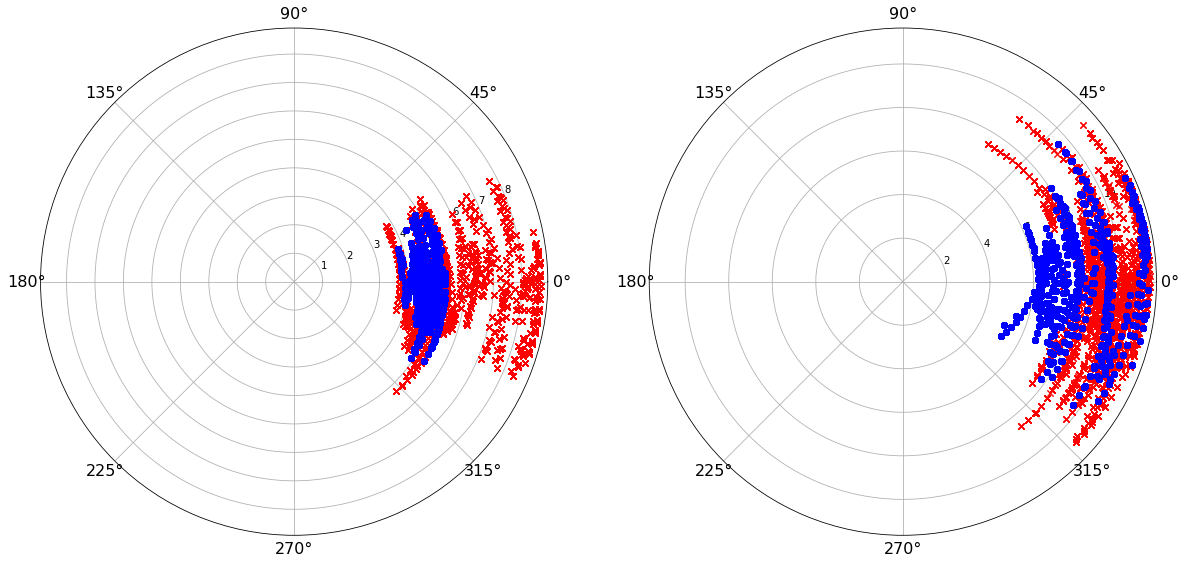

In [22]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1, projection='polar')
plt.polar(post_spikesLFP_vHip_WT[0], post_spikesLFP_vHip_WT[1], 'xr', alpha=0.5)
plt.polar(pre_spikesLFP_vHip_WT[0], pre_spikesLFP_vHip_WT[1], 'ob', alpha=0.5)
plt.xticks(fontsize=16)

plt.subplot(1,2,2, projection='polar')
plt.polar(post_spikesLFP_vHip_KO[0], post_spikesLFP_vHip_KO[1], 'xr', alpha=0.5)
plt.polar(pre_spikesLFP_vHip_KO[0], pre_spikesLFP_vHip_KO[1], 'ob', alpha=0.5)
plt.xticks(fontsize=16)

plt.savefig("/home/maspe/filer/SERT/ALL/figs/polars_theta_vHip.pdf", dpi=150, format='pdf')

In [ ]:
plt.hist(pre_flat_amplitudes, color='green', alpha=0.5, label='pre')
plt.hist(post_flat_amplitudes, color='red', alpha=0.5, label='post')
plt.legend(loc='upper right')

# plt.savefig("/home/maspe/filer/testFiles/figs/pre_post_hist.png", dpi=150, format='png')

In [ ]:
stat, p = stats.mannwhitneyu(pre_flat_amplitudes, post_flat_amplitudes)
if p > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

#########################

#### Unused codes

In [ ]:
# f, psd = signal.welch(theta_band, fs=30000, window='hann', nperseg=None, noverlap=None, nfft=None,
#                       detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')

In [ ]:
# # Plot the power spectrum
# plt.figure(figsize=(11,3))
# plt.semilogy(f,psd,'k')
# # sns.despine()
# plt.xlim((0,100))
# plt.yticks(size=15)
# plt.xticks(size=15)
# plt.ylabel('power ($uV^{2}/Hz$)',size=15)
# plt.xlabel('frequency (Hz)',size=15)
# plt.title('PSD of Local Field Potential', size=20)
# plt.show()

In [ ]:
# freqs = np.fft.fftfreq(len(data), sampleRate)

# plt.plot(freqs[0:len(data)//2],2/len(data)*np.abs(theta_band[0:len(data)//2]))
# plt.xlim([0,10])

In [ ]:
# def butter_bandpass(lowcut, highcut, fs, order):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = signal.butter(order, [low, high], btype='bandpass')
#     return b, a

# [b, a] = butter_bandpass(lowcut = 4, highcut = 8, fs = 30000.0, order = 3)

In [ ]:
# Cxy = cm.coherence(CC1973.item()['data'], average = False)

# fig = plt.figure(figsize=(150,150))
# plt.matshow(Cxy)
# plt.xticks(ticks=np.arange(0, 32, 8), labels=['OFC', 'mPFC', 'DMS', 'BLA'], rotation=0)
# plt.yticks(ticks=np.arange(0, 32, 8), labels=['OFC', 'mPFC', 'DMS', 'BLA'], rotation=0)
# plt.colorbar()
# plt.show()

# fig.savefig("/home/maspe/filer/testFiles/figs/coherence.png", dpi=150, format='png')

In [ ]:
n_iterations = np.int(np.floor(len_data/sampleRate))

phases = np.zeros((1, n_iterations))
phases.shape

In [ ]:
#### Sum spikes and make raster plot 
fitting = fit_27

keys = list(fitting['spiketimes'].keys())
n_units = len(keys)
units = [int(keys[this_unit][5:]) for this_unit in range(n_units)]
len_data = mPFC.shape[1]
all_spikes = np.array([], dtype='int')

spiketimes_matrix = np.zeros((n_units, len_data))

for unit in range(n_units):
    spiketimes_matrix[units[unit], fitting['spiketimes'][keys[unit]]] = unit
#     all_spikes = np.append(all_spikes, fitting['spiketimes'][keys[unit]].value)

# all_spikes = np.unique(all_spikes)
    
t_matrix = spiketimes_matrix[:, 0:5000000]
t_matrix[t_matrix == 0] = float('nan')

matrix2plot = t_matrix

# plt.subplot(2, 1, 1)
fig = plt.figure()
for unit in range(n_units):
    plt.plot(matrix2plot[unit, :], '|', color='black', markersize=2)
    
plt.xticks([])
plt.ylabel('unit')
    
# plt.subplot(2, 1, 2)
# plt.plot(np.arange(0, matrix2plot.shape[1]), np.nansum(matrix2plot,0), '-', color='gray')
# plt.xlabel('time')
# plt.ylabel('counts')

